# Data Collection and Preliminary Understanding

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.signal import periodogram

from IPython.display import Image 

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from tpot import TPOTRegressor

In [7]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

In [11]:
import pymc3 as pm
import theano.tensor as tt

In [128]:
from scipy.optimize import minimize

In [247]:
df_f = pd.read_csv("DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv")
df_l = pd.read_csv("DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv")

In [13]:
df_f

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [14]:
df_l

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [15]:
df = pd.concat([df_f,df_l['total_cases']],axis = 1)

In [16]:
df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [17]:
df.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [18]:
df['week_start_date'] = pd.to_datetime(df['week_start_date'])

In [32]:
sj = df[df['city']=='sj']

In [33]:
sj.dtypes

city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

In [34]:
sj.shape

(936, 25)

In [35]:
sj = sj.drop(['city','year'],axis=1)

In [36]:
sj[sj['precipitation_amt_mm']!=sj['reanalysis_sat_precip_amt_mm']]

,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
87,1,1992-01-01,0.12510,0.157867,0.185283,0.181367,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81
93,7,1992-02-12,NaN,0.130500,0.195743,0.178857,NaN,297.798571,298.057143,294.650000,...,82.875714,NaN,16.060000,2.200000,26.028571,6.571429,32.2,20.0,1.3,65
94,8,1992-02-19,NaN,0.184467,0.194614,0.203057,NaN,297.898571,298.107143,293.628571,...,77.295714,NaN,15.012857,2.585714,25.757143,7.385714,33.9,21.7,8.9,33
95,9,1992-02-26,0.10705,0.081500,0.165243,0.163057,NaN,297.472857,297.678571,292.967143,...,76.037143,NaN,14.381429,2.414286,25.285714,6.171429,29.4,21.7,16.0,38
139,53,1993-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
399,1,1998-01-01,0.04550,0.047800,0.123986,0.083443,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64
451,53,1999-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59
711,1,2004-01-01,-0.26830,-0.123700,0.223757,0.176543,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
763,53,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [37]:
sj = sj.drop(['reanalysis_sat_precip_amt_mm'],axis=1)

In [38]:
def convert_to_celsius(df,k):
    for i in k:
        df[i[:-1]+'c'] = df[i] - 273.15
    return df

In [39]:
k_t_list = ['reanalysis_air_temp_k','reanalysis_avg_temp_k','reanalysis_dew_point_temp_k',
            'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']
convert_to_celsius(sj,k_t_list)

,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c
0,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,6.900000,29.4,20.0,16.0,4,24.422857,24.592857,19.264286,26.65,22.75
1,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,6.371429,31.7,22.2,8.6,5,25.061429,25.292857,20.801429,27.75,23.25
2,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,6.485714,32.2,22.8,41.4,4,25.631429,25.728571,22.284286,27.35,24.15
3,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,6.771429,33.3,23.3,4.0,3,25.837143,26.078571,22.160000,28.25,23.85
4,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,9.371429,35.0,23.9,5.8,6,26.368571,26.514286,22.671429,28.75,24.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,13,2008-03-25,0.077850,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,...,5.785714,30.0,21.1,1.8,4,23.808571,23.807143,18.945714,26.55,21.25
932,14,2008-04-01,-0.038000,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,...,6.814286,30.6,22.2,0.5,3,24.931429,25.078571,20.085714,26.65,23.35
933,15,2008-04-08,-0.155200,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,...,5.714286,29.4,21.7,30.7,1,24.310000,24.414286,19.582857,26.25,22.65
934,16,2008-04-15,0.001800,NaN,0.203900,0.209843,0.00,297.630000,297.778571,292.274286,...,6.242857,29.4,21.7,11.2,3,24.480000,24.628571,19.124286,26.55,22.75


In [40]:
sj = sj.drop(k_t_list,axis=1)

In [41]:
sj

,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,...,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c
0,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,32.00,73.365714,14.012857,...,6.900000,29.4,20.0,16.0,4,24.422857,24.592857,19.264286,26.65,22.75
1,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,17.94,77.368571,15.372857,...,6.371429,31.7,22.2,8.6,5,25.061429,25.292857,20.801429,27.75,23.25
2,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,26.10,82.052857,16.848571,...,6.485714,32.2,22.8,41.4,4,25.631429,25.728571,22.284286,27.35,24.15
3,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,13.90,80.337143,16.672857,...,6.771429,33.3,23.3,4.0,3,25.837143,26.078571,22.160000,28.25,23.85
4,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,12.20,80.460000,17.210000,...,9.371429,35.0,23.9,5.8,6,26.368571,26.514286,22.671429,28.75,24.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,13,2008-03-25,0.077850,-0.039900,0.310471,0.296243,27.19,7.55,74.247143,13.644286,...,5.785714,30.0,21.1,1.8,4,23.808571,23.807143,18.945714,26.55,21.25
932,14,2008-04-01,-0.038000,-0.016833,0.119371,0.066386,3.82,3.67,74.600000,14.662857,...,6.814286,30.6,22.2,0.5,3,24.931429,25.078571,20.085714,26.65,23.35
933,15,2008-04-08,-0.155200,-0.052750,0.137757,0.141214,16.96,35.00,75.027143,14.184286,...,5.714286,29.4,21.7,30.7,1,24.310000,24.414286,19.582857,26.25,22.65
934,16,2008-04-15,0.001800,NaN,0.203900,0.209843,0.00,4.82,72.285714,13.858571,...,6.242857,29.4,21.7,11.2,3,24.480000,24.628571,19.124286,26.55,22.75


#### CFSR利用了大量的卫星数据和模型输出，而GHCN主要基于地面站点的实际测量
#### 0.25x0.25度的单元格大约代表了一个27.8公里乘以27.8公里的区域，而sj面积14,344平方公里

In [42]:
sj = sj.drop(['precipitation_amt_mm', 'reanalysis_air_temp_c','reanalysis_avg_temp_c','reanalysis_max_air_temp_c',
        'reanalysis_min_air_temp_c','reanalysis_tdtr_k'],axis=1)

In [43]:
sns.set_style("whitegrid")
sns.set_palette("deep")

R-squared: 0.22860094231927275


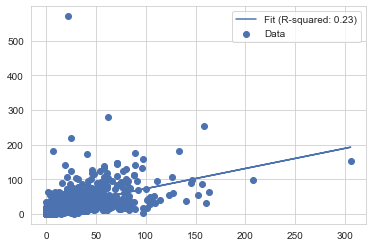

In [44]:
x = sj['station_precip_mm']
y = sj['reanalysis_precip_amt_kg_per_m2']

cleaned_data = pd.concat([x, y], axis=1).dropna()

x_clean = cleaned_data['station_precip_mm'].values.reshape(-1, 1)
y_clean = cleaned_data['reanalysis_precip_amt_kg_per_m2'].values

model = LinearRegression().fit(x_clean, y_clean)

r_squared = model.score(x_clean, y_clean)
print(f'R-squared: {r_squared}')

plt.scatter(x_clean, y_clean, label='Data')
plt.plot(x_clean, model.predict(x_clean), label=f'Fit (R-squared: {r_squared:.2f})')
plt.legend()
plt.show()

R-squared: 0.45461992194971224


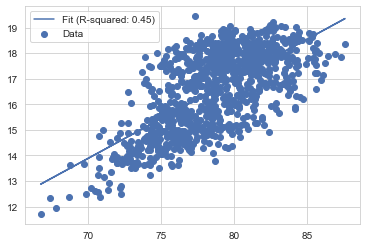

In [45]:
x = sj['reanalysis_relative_humidity_percent']
y = sj['reanalysis_specific_humidity_g_per_kg']

cleaned_data = pd.concat([x, y], axis=1).dropna()

x_clean = cleaned_data['reanalysis_relative_humidity_percent'].values.reshape(-1, 1)
y_clean = cleaned_data['reanalysis_specific_humidity_g_per_kg'].values

model = LinearRegression().fit(x_clean, y_clean)

r_squared = model.score(x_clean, y_clean)
print(f'R-squared: {r_squared}')

plt.scatter(x_clean, y_clean, label='Data')
plt.plot(x_clean, model.predict(x_clean), label=f'Fit (R-squared: {r_squared:.2f})')
plt.legend()
plt.show()

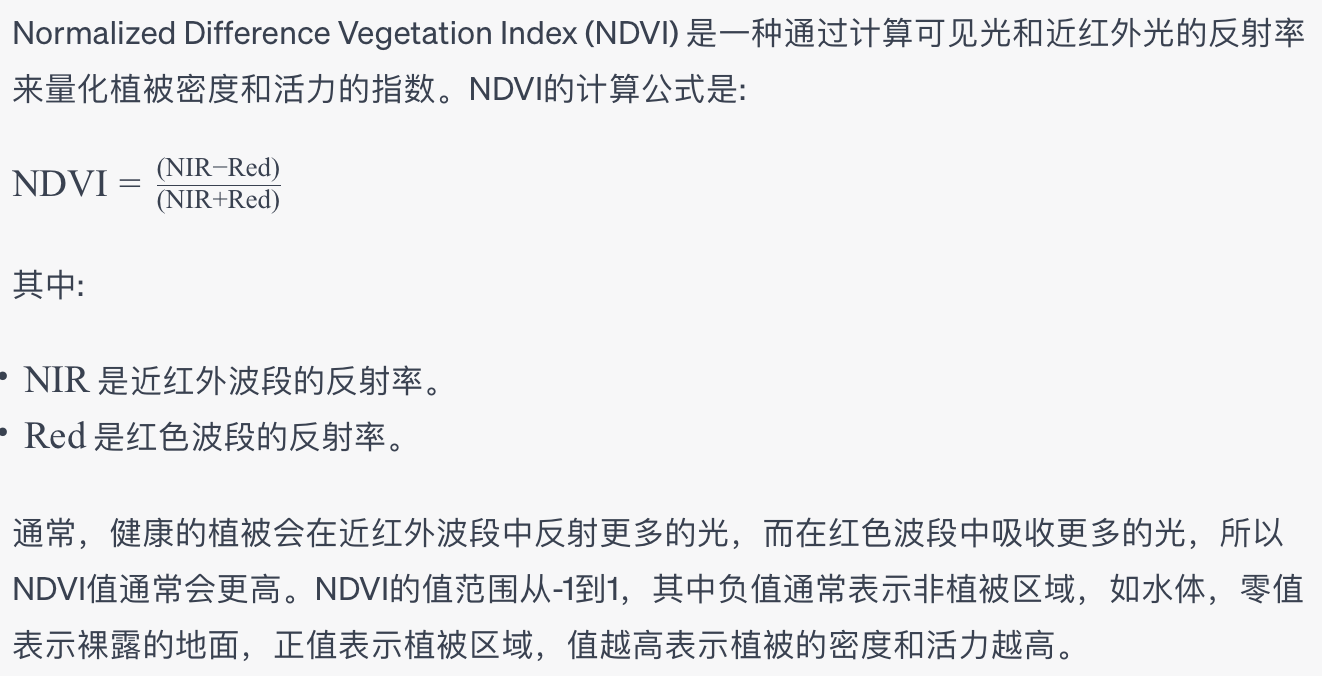

In [46]:
Image("WechatIMG287.jpg")

# Exploratory Data Analysis (EDA) - Phase One

## Descriptive Statistics

In [47]:
summary = sj.describe()
summary.T

,count,mean,std,min,25%,50%,75%,max
weekofyear,936.0,26.503205,15.021909,1.000000,13.750000,26.500000,39.250000,53.000000
ndvi_ne,745.0,0.057925,0.107153,-0.406250,0.004500,0.057700,0.111100,0.493400
ndvi_nw,887.0,0.067469,0.092479,-0.456100,0.016425,0.068075,0.115200,0.437100
ndvi_se,917.0,0.177655,0.057166,-0.015533,0.139283,0.177186,0.212557,0.393129
ndvi_sw,917.0,0.165956,0.056073,-0.063457,0.129157,0.165971,0.202771,0.381420
reanalysis_precip_amt_kg_per_m2,930.0,30.465419,35.628055,0.000000,10.825000,21.300000,37.000000,570.500000
reanalysis_relative_humidity_percent,930.0,78.568181,3.389488,66.735714,76.246071,78.667857,80.963214,87.575714
reanalysis_specific_humidity_g_per_kg,930.0,16.552409,1.560923,11.715714,15.236429,16.845714,17.858571,19.440000
station_avg_temp_c,930.0,27.006528,1.415473,22.842857,25.842857,27.228571,28.185714,30.071429
station_diur_temp_rng_c,930.0,6.757373,0.835993,4.528571,6.200000,6.757143,7.285714,9.914286


In [48]:
variance = sj.var()
print(variance)

weekofyear                                225.657744
ndvi_ne                                     0.011482
ndvi_nw                                     0.008552
ndvi_se                                     0.003268
ndvi_sw                                     0.003144
reanalysis_precip_amt_kg_per_m2          1269.358301
reanalysis_relative_humidity_percent       11.488627
reanalysis_specific_humidity_g_per_kg       2.436481
station_avg_temp_c                          2.003565
station_diur_temp_rng_c                     0.698884
station_max_temp_c                          2.949108
station_min_temp_c                          2.268869
station_precip_mm                         860.003180
total_cases                              2640.045440
reanalysis_dew_point_temp_c                 2.464722
dtype: float64


/var/folders/pj/9y_1xfsd6hgdycw5q9sfcq5w0000gn/T/ipykernel_47879/3722301002.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance = sj.var()


In [49]:
skewness = sj.skew()
print(skewness)

weekofyear                               0.001282
ndvi_ne                                 -0.016905
ndvi_nw                                 -0.086188
ndvi_se                                  0.215362
ndvi_sw                                  0.146345
reanalysis_precip_amt_kg_per_m2          5.568382
reanalysis_relative_humidity_percent    -0.192060
reanalysis_specific_humidity_g_per_kg   -0.468625
station_avg_temp_c                      -0.309973
station_diur_temp_rng_c                  0.104128
station_max_temp_c                      -0.438909
station_min_temp_c                      -0.391557
station_precip_mm                        2.630498
total_cases                              4.478951
reanalysis_dew_point_temp_c             -0.626015
dtype: float64


/var/folders/pj/9y_1xfsd6hgdycw5q9sfcq5w0000gn/T/ipykernel_47879/1394509435.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = sj.skew()


In [50]:
kurtosis = sj.kurt()
print(kurtosis)

weekofyear                               -1.199105
ndvi_ne                                   2.043667
ndvi_nw                                   2.036564
ndvi_se                                   0.431881
ndvi_sw                                   0.653120
reanalysis_precip_amt_kg_per_m2          62.729650
reanalysis_relative_humidity_percent     -0.072789
reanalysis_specific_humidity_g_per_kg    -0.730868
station_avg_temp_c                       -0.893883
station_diur_temp_rng_c                   0.481478
station_max_temp_c                       -0.521300
station_min_temp_c                       -0.466088
station_precip_mm                        12.785648
total_cases                              25.372135
reanalysis_dew_point_temp_c              -0.393726
dtype: float64


/var/folders/pj/9y_1xfsd6hgdycw5q9sfcq5w0000gn/T/ipykernel_47879/3902502835.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurtosis = sj.kurt()


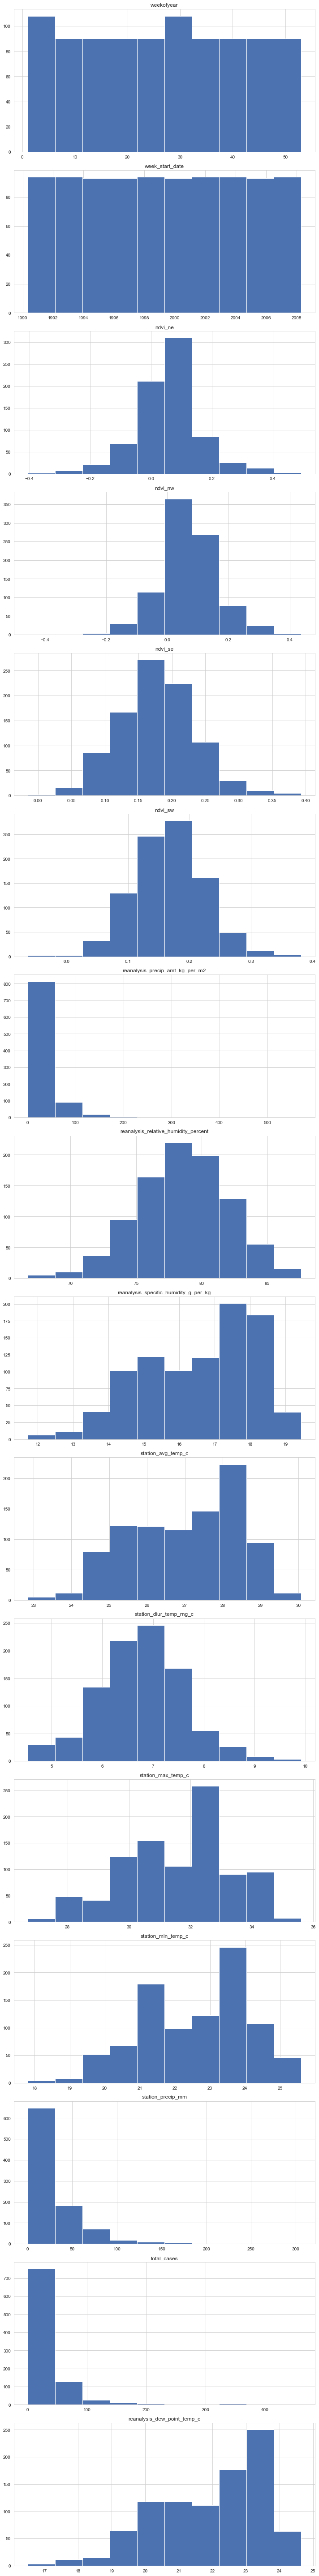

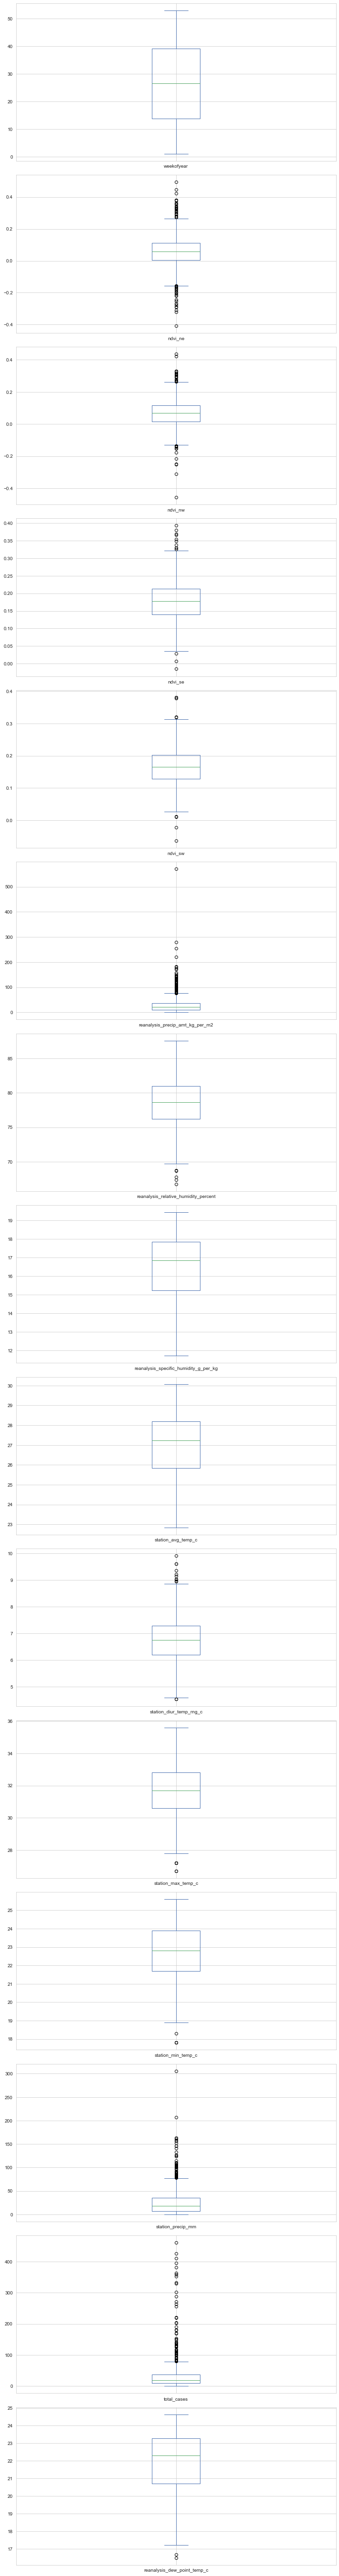

In [51]:
import matplotlib.pyplot as plt

sj.hist(layout=(sj.shape[1], 1), figsize=(10, sj.shape[1]*5))
plt.tight_layout()
plt.show()

sj.plot(kind='box', subplots=True, layout=(sj.shape[1], 1), figsize=(10, sj.shape[1]*5), sharex=False)
plt.tight_layout()
plt.show()

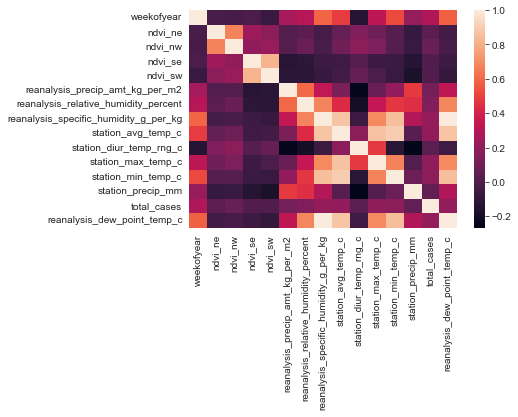

In [56]:
correlation = sj.corr()
sns.heatmap(correlation)
plt.show()

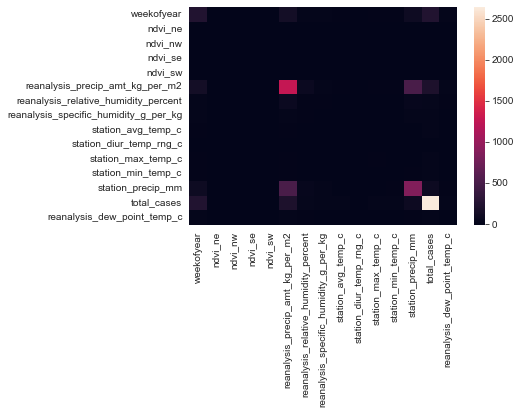

In [57]:
covariance = sj.cov()
sns.heatmap(covariance)
plt.show()

## Visualization

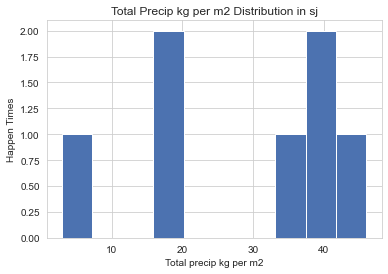

In [58]:
plt.hist(sj[sj['station_precip_mm'] >= 150]['weekofyear'])

plt.title('Total Precip kg per m2 Distribution in sj')
plt.xlabel('Total precip kg per m2')
plt.ylabel('Happen Times')

plt.show()

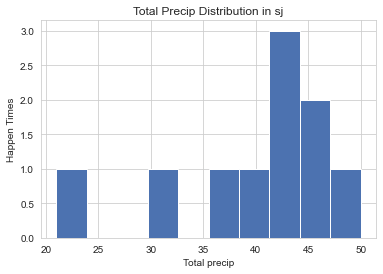

In [59]:
plt.hist(sj[sj['reanalysis_precip_amt_kg_per_m2'] >= 150]['weekofyear'])

plt.title('Total Precip Distribution in sj')
plt.xlabel('Total precip')
plt.ylabel('Happen Times')

plt.show()

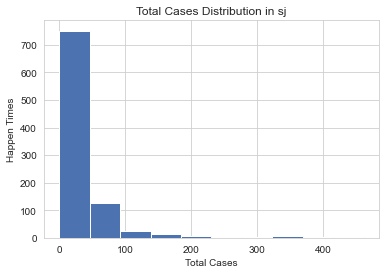

In [60]:
plt.hist(sj['total_cases'])

plt.title('Total Cases Distribution in sj')
plt.xlabel('Total Cases')
plt.ylabel('Happen Times')

plt.show()

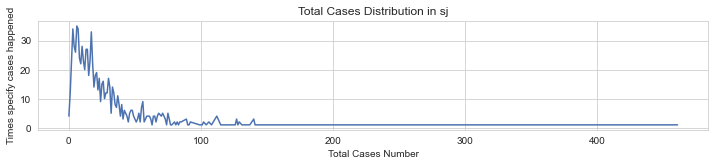

In [61]:
l_n_c = list(sj['total_cases'].unique())
l_n_c.sort()

l_n = []
for i in l_n_c:
    l_n.append(sj[sj['total_cases'] == i]['total_cases'].count())
    
plt.figure(figsize=(12,2))
plt.plot(l_n_c, l_n)

plt.title('Total Cases Distribution in sj')
plt.xlabel('Total Cases Number')
plt.ylabel('Times specify cases happened')

plt.show()

In [62]:
df_n = pd.DataFrame([l_n_c,l_n]).T
df_n.columns = ['Cases count', 'Happen times']
df_n[df_n['Happen times'] == 5]

,Cases count,Happen times
32,32,5
43,43,5
46,46,5
53,53,5
67,68,5
69,71,5
73,75,5


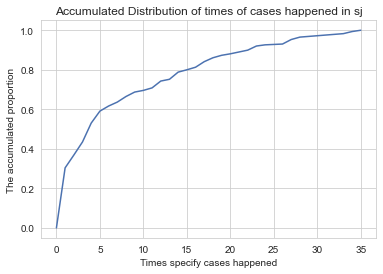

In [63]:
sum_case_num = sj['total_cases'].sum()

n_list = list(df_n['Happen times'].unique())
n_list.sort()

acc_l = []

for i in n_list:
    acc_l.append(df_n[df_n['Happen times'] == i]['Cases count'].sum()*i/sum_case_num)
    
for k in range(1,len(acc_l)):
    acc_l[k] = acc_l[k] + acc_l[k-1]

n_list.insert(0,0)
acc_l.insert(0,0)

df_acc = pd.DataFrame([n_list, acc_l])

plt.plot(n_list, acc_l)

plt.title('Accumulated Distribution of times of cases happened in sj')
plt.xlabel('Times specify cases happened')
plt.ylabel('The accumulated proportion')

plt.show()

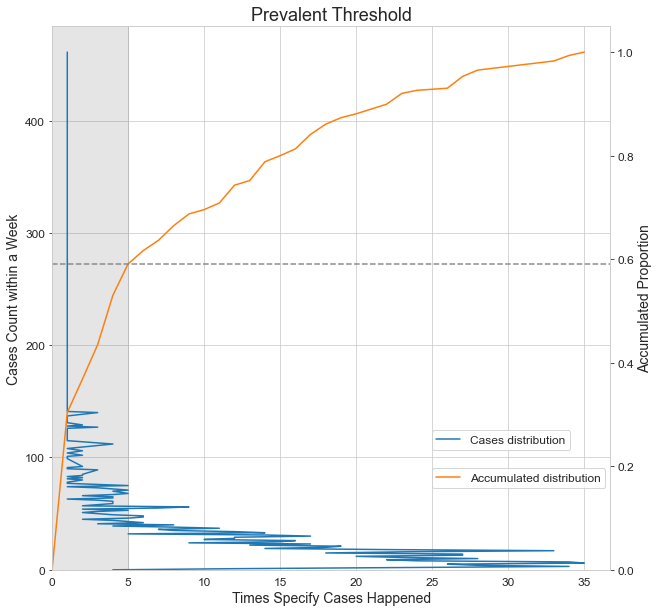

In [64]:
sns.set_style("whitegrid")
sns.set_palette("deep")

fig, ax1 = plt.subplots(figsize=(10, 10))

colors = sns.color_palette()

ax1.plot(l_n, l_n_c, color='#1f77b4', label='Cases distribution')
ax1.set_ylabel('Cases Count within a Week', fontsize=14)
ax1.set_xlabel('Times Specify Cases Happened', fontsize=14)
ax1.tick_params(axis='y', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.legend(loc=(0.68,0.22), fontsize=12)
ax1.set_xlim(left=0)
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()

ax2.plot(n_list, acc_l, color='#ff7f0e', label='Accumulated distribution')
ax2.set_ylabel('Accumulated Proportion', fontsize=14)
ax2.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='x', labelsize=12)
ax2.legend(loc=(0.68,0.15), fontsize=12)
ax2.grid(False)
ax2.set_xlim(left=0)
ax2.set_ylim(bottom=0)

xi = 5
y1i = 32
y2i = 0.590911

ax2.axhline(y2i, xmin=0, xmax=35, linestyle='--', color='grey', alpha=0.9)
#ax1.axhline(y1i, xmin=0, xmax=35, linestyle='--', color='grey', alpha=0.8)
ax1.fill_between([0,xi], y1=0, y2=484, color='grey', alpha=0.2)
#ax2.fill_between([0,35], y1=y2i, y2=1, color='grey', alpha=0.2)


plt.title("Prevalent Threshold", fontsize=18)

plt.show()
                        
#fig.savefig('output_image.png', dpi=500)

## Missing Value Analysis

In [65]:
print(sj.isnull().sum())

weekofyear                                 0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_specific_humidity_g_per_kg      6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_min_temp_c                         6
station_precip_mm                          6
total_cases                                0
reanalysis_dew_point_temp_c                6
dtype: int64


# Data Preprocessing

## Handling Missing Values

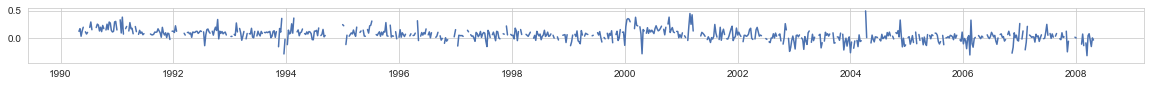

In [66]:
plt.figure(figsize = (20,1))
plt.plot(sj['week_start_date'],sj['ndvi_ne'])
plt.show()

In [67]:
dne_sj = sj[sj['ndvi_ne'].isnull()][['week_start_date','weekofyear','ndvi_ne']]

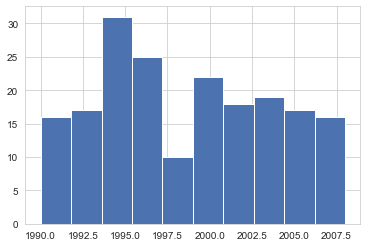

In [68]:
plt.hist(dne_sj['week_start_date'].dt.year)
plt.show()

In [69]:
filled_data = sj['ndvi_ne'].interpolate(method='linear')

/var/folders/pj/9y_1xfsd6hgdycw5q9sfcq5w0000gn/T/ipykernel_47879/1312620438.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(filled_data, model='additive', freq=52)


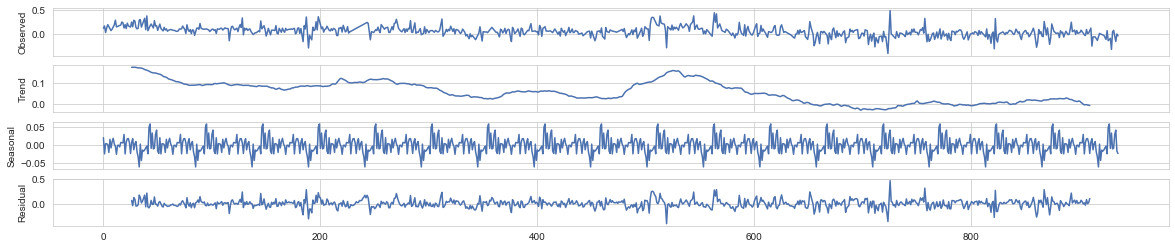

In [71]:
result = seasonal_decompose(filled_data, model='additive', freq=52)
fig, axes = plt.subplots(4, 1, figsize=(20, 4), sharex=True)
result.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
result.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')
plt.show()

In [72]:
sj['ndvi_ne'] = sj['ndvi_ne'].interpolate(method='linear')
sj['ndvi_nw'] = sj['ndvi_nw'].interpolate(method='linear')
sj['ndvi_se'] = sj['ndvi_se'].interpolate(method='linear')
sj['ndvi_sw'] = sj['ndvi_sw'].interpolate(method='linear')

In [73]:
print(sj.isnull().sum())

weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
reanalysis_precip_amt_kg_per_m2          6
reanalysis_relative_humidity_percent     6
reanalysis_specific_humidity_g_per_kg    6
station_avg_temp_c                       6
station_diur_temp_rng_c                  6
station_max_temp_c                       6
station_min_temp_c                       6
station_precip_mm                        6
total_cases                              0
reanalysis_dew_point_temp_c              6
dtype: int64


In [74]:
mean_fill_l = ['reanalysis_relative_humidity_percent','reanalysis_specific_humidity_g_per_kg',
  'station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c',
  'reanalysis_dew_point_temp_c']

for i in range(len(mean_fill_l)):
    sj[mean_fill_l[i]].fillna(sj[mean_fill_l[i]].mean(),inplace = True)

In [75]:
print(sj.isnull().sum())

weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
reanalysis_precip_amt_kg_per_m2          6
reanalysis_relative_humidity_percent     0
reanalysis_specific_humidity_g_per_kg    0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        6
total_cases                              0
reanalysis_dew_point_temp_c              0
dtype: int64


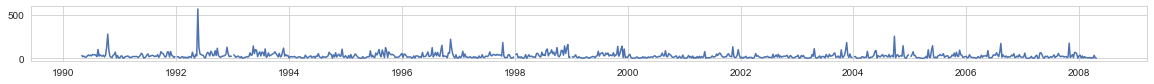

In [76]:
plt.figure(figsize = (20,1))
plt.plot(sj['week_start_date'],sj['reanalysis_precip_amt_kg_per_m2'])
plt.show()

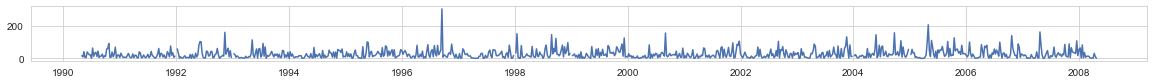

In [77]:
plt.figure(figsize = (20,1))
plt.plot(sj['week_start_date'],sj['station_precip_mm'])
plt.show()

In [78]:
sj['reanalysis_precip_amt_kg_per_m2'] = sj['reanalysis_precip_amt_kg_per_m2'].interpolate(method='linear')
sj['station_precip_mm'] = sj['station_precip_mm'].interpolate(method='linear')

In [79]:
print(sj.isnull().sum())

weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_specific_humidity_g_per_kg    0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
total_cases                              0
reanalysis_dew_point_temp_c              0
dtype: int64


## Dataset Splitting

In [80]:
sj.set_index('week_start_date', inplace=True)

In [81]:
train_size = int(len(sj) * 0.7)
val_size = int(len(sj) * 0.1)

In [82]:
train = sj.iloc[:train_size]
val = sj.iloc[train_size:train_size + val_size]
test = sj.iloc[train_size + val_size:]

In [83]:
train

,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,reanalysis_dew_point_temp_c
week_start_date,,,,,,,,,,,,,,,
1990-04-30,18,0.122600,0.103725,0.198483,0.177617,32.00,73.365714,14.012857,25.442857,6.900000,29.4,20.0,16.0,4,19.264286
1990-05-07,19,0.169900,0.142175,0.162357,0.155486,17.94,77.368571,15.372857,26.714286,6.371429,31.7,22.2,8.6,5,20.801429
1990-05-14,20,0.032250,0.172967,0.157200,0.170843,26.10,82.052857,16.848571,26.714286,6.485714,32.2,22.8,41.4,4,22.284286
1990-05-21,21,0.128633,0.245067,0.227557,0.235886,13.90,80.337143,16.672857,27.471429,6.771429,33.3,23.3,4.0,3,22.160000
1990-05-28,22,0.196200,0.262200,0.251200,0.247340,12.20,80.460000,17.210000,28.942857,9.371429,35.0,23.9,5.8,6,22.671429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-10-29,44,0.007350,-0.025450,0.199343,0.179543,34.70,77.620000,17.688571,27.542857,6.571429,31.7,23.3,31.3,10,23.090000
2002-11-05,45,0.261400,0.110220,0.291800,0.318500,9.50,76.167143,17.265714,27.385714,6.542857,31.1,23.3,8.4,6,22.702857
2002-11-12,46,0.147833,-0.003125,0.278157,0.247729,7.60,73.781429,16.818571,27.314286,7.014286,31.1,22.8,3.8,13,22.297143


# Feature Engineering - Phase One

## Creating Lagged Variables

In [84]:
def create_lagged_vars(df, columns, lags):
    for column in columns:
        for lag in lags:
            if column not in df:
                raise ValueError(f"Column {column} not found in DataFrame")
            df[f'{column}_lag{lag}'] = df[column].shift(lag)
    return df.dropna()

In [85]:
lags = [1, 2, 4, 8, 12]

In [86]:
columns = ['station_avg_temp_c', 'station_precip_mm', 'total_cases']

In [87]:
train = create_lagged_vars(train, columns, lags)

/var/folders/pj/9y_1xfsd6hgdycw5q9sfcq5w0000gn/T/ipykernel_47879/2525416368.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_lag{lag}'] = df[column].shift(lag)


In [88]:
train

,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,...,station_precip_mm_lag1,station_precip_mm_lag2,station_precip_mm_lag4,station_precip_mm_lag8,station_precip_mm_lag12,total_cases_lag1,total_cases_lag2,total_cases_lag4,total_cases_lag8,total_cases_lag12
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-07-23,30,0.150567,0.171700,0.226900,0.214557,42.53,80.742857,17.341429,28.114286,6.357143,...,12.2,63.7,21.1,5.8,16.0,2.0,8.0,10.0,6.0,4.0
1990-07-30,31,0.160483,0.247150,0.379700,0.381357,34.60,80.584286,17.594286,28.242857,8.085714,...,32.6,12.2,1.1,39.1,8.6,6.0,2.0,6.0,2.0,5.0
1990-08-06,32,0.170400,0.064333,0.164443,0.138857,20.00,79.650000,17.950000,28.200000,7.557143,...,37.6,32.6,63.7,29.7,41.4,17.0,6.0,8.0,4.0,4.0
1990-08-13,33,0.180317,0.128033,0.206957,0.168243,101.90,84.178571,18.515714,28.042857,6.685714,...,11.4,37.6,12.2,21.1,4.0,23.0,17.0,2.0,5.0,3.0
1990-08-20,34,0.190233,0.168800,0.167657,0.172286,25.90,80.947143,18.174286,28.342857,7.014286,...,44.7,11.4,32.6,21.1,5.8,13.0,23.0,6.0,10.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-10-29,44,0.007350,-0.025450,0.199343,0.179543,34.70,77.620000,17.688571,27.542857,6.571429,...,53.3,6.1,72.7,105.0,3.6,5.0,5.0,7.0,7.0,4.0
2002-11-05,45,0.261400,0.110220,0.291800,0.318500,9.50,76.167143,17.265714,27.385714,6.542857,...,31.3,53.3,26.0,2.3,13.6,10.0,5.0,9.0,6.0,7.0
2002-11-12,46,0.147833,-0.003125,0.278157,0.247729,7.60,73.781429,16.818571,27.314286,7.014286,...,8.4,31.3,6.1,53.2,48.1,6.0,10.0,5.0,4.0,6.0


## Interaction Features

In [89]:
def create_interaction_vars(df, columns1, columns2):
    for column1 in columns1:
        for column2 in columns2:
            if column1 not in df or column2 not in df:
                raise ValueError(f"Column {column1} or {column2} not found in DataFrame")
            if not (pd.api.types.is_numeric_dtype(df[column1]) and pd.api.types.is_numeric_dtype(df[column2])):
                raise TypeError(f"Columns {column1} and {column2} must be numeric")
            new_column_name = f'{column1}*{column2}'
            if new_column_name in df:
                raise ValueError(f"Column {new_column_name} already exists in DataFrame")
            df[f'{column1}*{column2}'] = df[column1]*df[column2]
    return df

In [90]:
train = create_interaction_vars(train, ['station_max_temp_c', 'station_min_temp_c', 'station_avg_temp_c',
                                       'station_diur_temp_rng_c']
                                , ['reanalysis_precip_amt_kg_per_m2', 'station_precip_mm'])

/var/folders/pj/9y_1xfsd6hgdycw5q9sfcq5w0000gn/T/ipykernel_47879/4234690929.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column1}*{column2}'] = df[column1]*df[column2]


In [91]:
train

,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,...,total_cases_lag8,total_cases_lag12,station_max_temp_c*reanalysis_precip_amt_kg_per_m2,station_max_temp_c*station_precip_mm,station_min_temp_c*reanalysis_precip_amt_kg_per_m2,station_min_temp_c*station_precip_mm,station_avg_temp_c*reanalysis_precip_amt_kg_per_m2,station_avg_temp_c*station_precip_mm,station_diur_temp_rng_c*reanalysis_precip_amt_kg_per_m2,station_diur_temp_rng_c*station_precip_mm
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-07-23,30,0.150567,0.171700,0.226900,0.214557,42.53,80.742857,17.341429,28.114286,6.357143,...,6.0,4.0,1348.201,1033.42,969.684,743.28,1195.700571,916.525714,270.369286,207.242857
1990-07-30,31,0.160483,0.247150,0.379700,0.381357,34.60,80.584286,17.594286,28.242857,8.085714,...,2.0,5.0,1190.240,1293.44,788.880,857.28,977.202857,1061.931429,279.765714,304.022857
1990-08-06,32,0.170400,0.064333,0.164443,0.138857,20.00,79.650000,17.950000,28.200000,7.557143,...,4.0,4.0,666.000,379.62,466.000,265.62,564.000000,321.480000,151.142857,86.151429
1990-08-13,33,0.180317,0.128033,0.206957,0.168243,101.90,84.178571,18.515714,28.042857,6.685714,...,5.0,3.0,3342.320,1466.16,2323.320,1019.16,2857.567143,1253.515714,681.274286,298.851429
1990-08-20,34,0.190233,0.168800,0.167657,0.172286,25.90,80.947143,18.174286,28.342857,7.014286,...,10.0,6.0,862.470,179.82,603.470,125.82,734.080000,153.051429,181.670000,37.877143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-10-29,44,0.007350,-0.025450,0.199343,0.179543,34.70,77.620000,17.688571,27.542857,6.571429,...,7.0,4.0,1099.990,992.21,808.510,729.29,955.737143,862.091429,228.028571,205.685714
2002-11-05,45,0.261400,0.110220,0.291800,0.318500,9.50,76.167143,17.265714,27.385714,6.542857,...,6.0,7.0,295.450,261.24,221.350,195.72,260.164286,230.040000,62.157143,54.960000
2002-11-12,46,0.147833,-0.003125,0.278157,0.247729,7.60,73.781429,16.818571,27.314286,7.014286,...,4.0,6.0,236.360,118.18,173.280,86.64,207.588571,103.794286,53.308571,26.654286


# Exploratory Data Analysis (EDA) - Phase Two

## Correlation Analysis

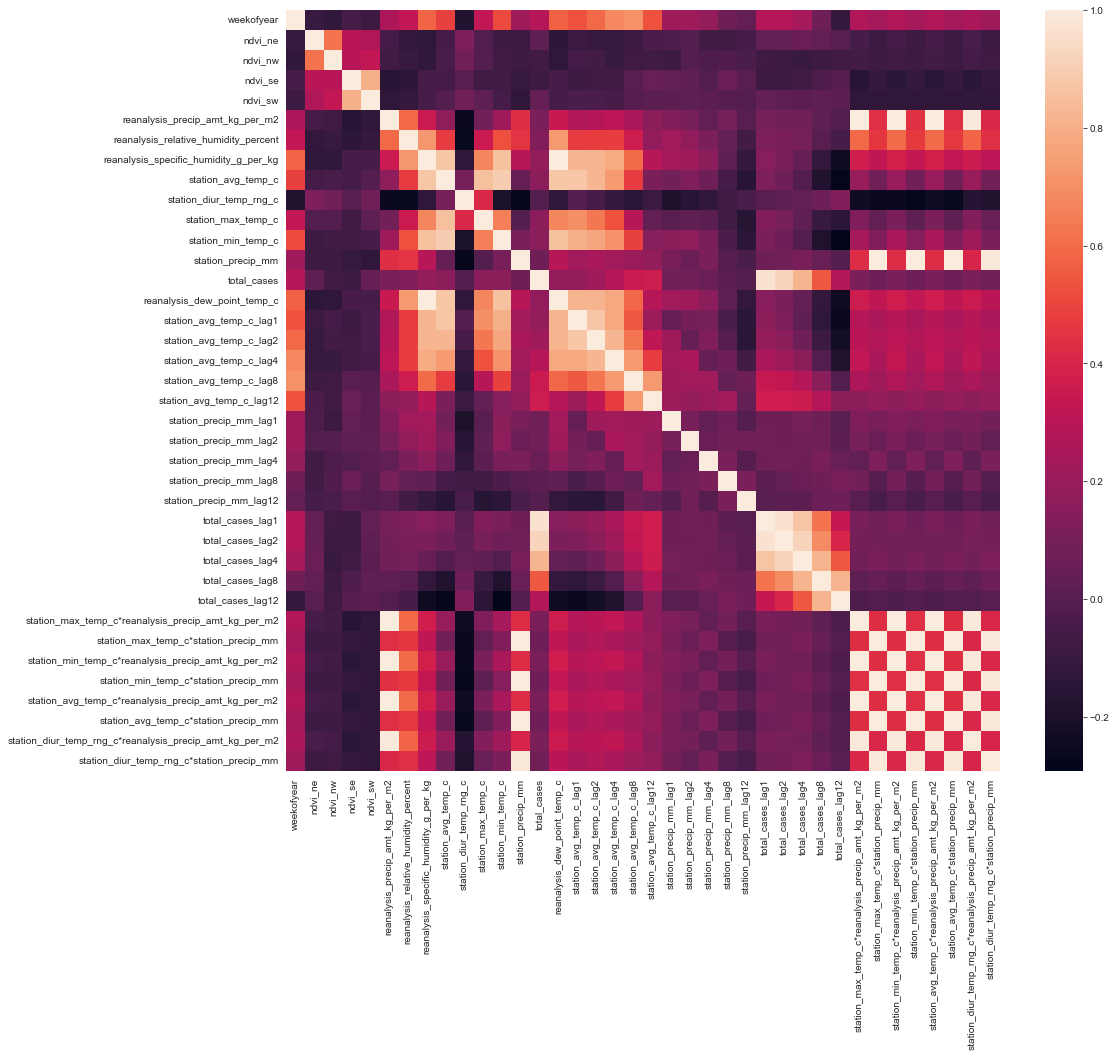

In [92]:
plt.figure(figsize=(16,14))
sns.heatmap(train.corr())
plt.show()

## Pattern Recognition

/var/folders/pj/9y_1xfsd6hgdycw5q9sfcq5w0000gn/T/ipykernel_47879/122613544.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(train['total_cases'], model='additive', freq=52)


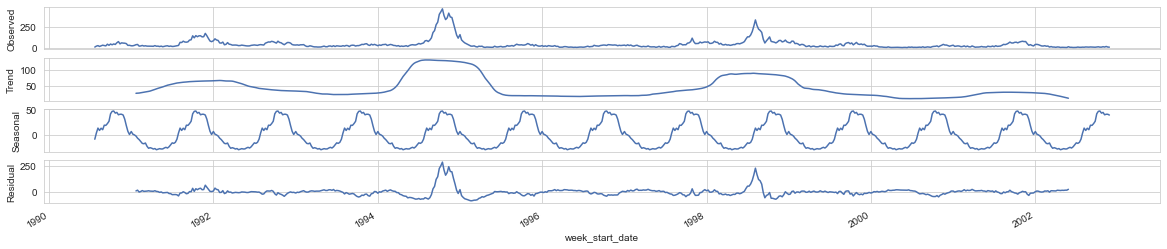

In [93]:
result = seasonal_decompose(train['total_cases'], model='additive', freq=52)
fig, axes = plt.subplots(4, 1, figsize=(20, 4), sharex=True)
result.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
result.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')
plt.show()

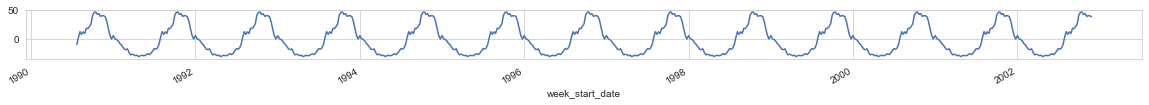

In [94]:
plt.figure(figsize=(20,1))
result.seasonal.plot()
plt.show()

# Feature Engineering - Phase Two

## Temporal Features

In [95]:
one_year_seasonal = result.seasonal.iloc[:52].reset_index(drop=True)
one_year_seasonal = one_year_seasonal.append(pd.Series(one_year_seasonal.iloc[0]), ignore_index=True)

def map_week_to_seasonal(week_of_year):
    index = (week_of_year - 30) % 52
    return one_year_seasonal[index]

train['seasonal_feature'] = train['weekofyear'].apply(map_week_to_seasonal)

/var/folders/pj/9y_1xfsd6hgdycw5q9sfcq5w0000gn/T/ipykernel_47879/3925559633.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['seasonal_feature'] = train['weekofyear'].apply(map_week_to_seasonal)


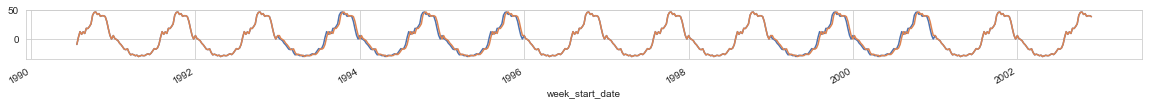

In [96]:
plt.figure(figsize=(20,1))
result.seasonal.plot()
plt.plot(train.index,train['seasonal_feature'])

plt.show()

## Feature Selection

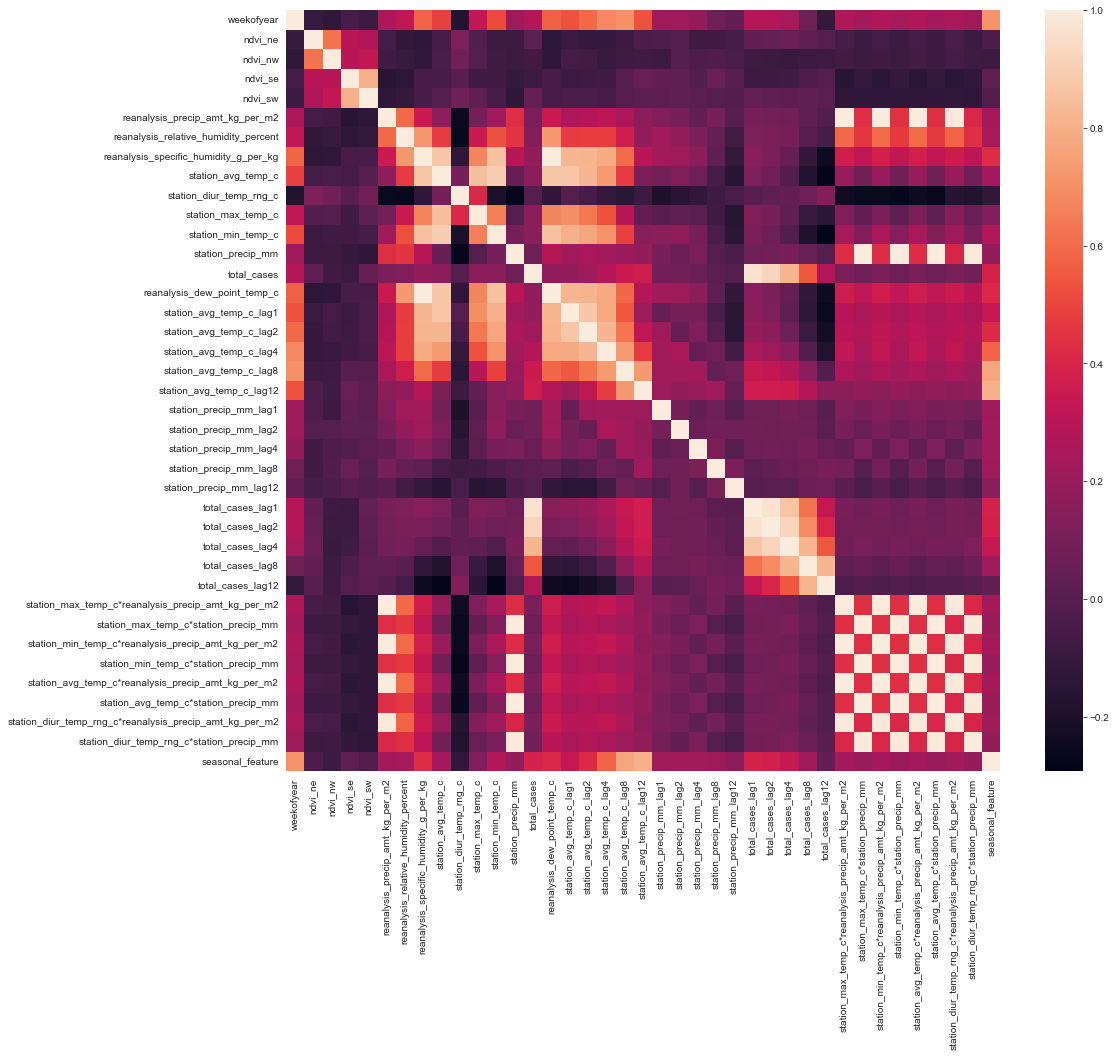

In [97]:
plt.figure(figsize=(16,14))
sns.heatmap(train.corr())
plt.show()

In [98]:
val = create_lagged_vars(val, columns, lags)
val = create_interaction_vars(val, ['station_max_temp_c', 'station_min_temp_c', 'station_avg_temp_c',
                                       'station_diur_temp_rng_c']
                                , ['reanalysis_precip_amt_kg_per_m2', 'station_precip_mm'])
val['seasonal_feature'] = val['weekofyear'].apply(map_week_to_seasonal)

/var/folders/pj/9y_1xfsd6hgdycw5q9sfcq5w0000gn/T/ipykernel_47879/2525416368.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_lag{lag}'] = df[column].shift(lag)


In [99]:
val

,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,...,total_cases_lag12,station_max_temp_c*reanalysis_precip_amt_kg_per_m2,station_max_temp_c*station_precip_mm,station_min_temp_c*reanalysis_precip_amt_kg_per_m2,station_min_temp_c*station_precip_mm,station_avg_temp_c*reanalysis_precip_amt_kg_per_m2,station_avg_temp_c*station_precip_mm,station_diur_temp_rng_c*reanalysis_precip_amt_kg_per_m2,station_diur_temp_rng_c*station_precip_mm,seasonal_feature
week_start_date,,,,,,,,,,,,,,,,,,,,,
2003-02-26,9,-0.030467,-0.000100,0.128633,0.156117,7.20,74.734286,15.194286,25.628571,6.742857,...,5.0,216.000,246.00,151.920,173.02,184.525714,210.154286,48.548571,55.291429,-18.242326
2003-03-05,10,-0.206350,-0.141000,0.322186,0.299829,0.50,72.690000,14.872857,25.285714,8.042857,...,9.0,14.700,149.94,10.300,105.06,12.642857,128.957143,4.021429,41.018571,-16.793608
2003-03-12,11,0.025350,0.048100,0.101843,0.136529,2.70,74.608571,15.490000,26.542857,7.385714,...,3.0,83.970,80.86,58.590,56.42,71.665714,69.011429,19.941429,19.202857,-23.268768
2003-03-19,12,-0.052033,0.014220,0.155643,0.182271,1.80,72.135714,14.884286,26.457143,7.928571,...,6.0,55.980,40.43,39.060,28.21,47.622857,34.394286,14.271429,10.307143,-27.228704
2003-03-26,13,-0.116900,-0.091575,0.152729,0.186771,7.30,74.325714,15.221429,26.928571,7.057143,...,11.0,235.060,64.40,166.440,45.60,196.578571,53.857143,51.517143,14.114286,-26.098095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-08-12,33,0.037400,0.108400,0.125300,0.177414,14.10,76.171429,17.818571,28.942857,7.228571,...,3.0,477.990,355.95,344.040,256.20,408.094286,303.900000,101.922857,75.900000,8.234000
2004-08-19,34,-0.016400,-0.021875,0.181600,0.170600,44.40,81.264286,18.774286,29.000000,6.314286,...,12.0,1429.680,911.26,1083.360,690.52,1287.600000,820.700000,280.354286,178.694286,12.602881
2004-08-26,35,0.099600,0.063300,0.100657,0.109429,13.50,79.684286,18.531429,29.057143,6.485714,...,13.0,449.550,685.98,337.500,515.00,392.271429,598.577143,87.557143,133.605714,9.701657


In [100]:
X_train = train.drop('total_cases', axis=1)
y_train = train['total_cases']

X_val = val.drop('total_cases', axis=1)
y_val = val['total_cases'] 

In [101]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [103]:
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)

LassoCV(cv=5, random_state=42)

In [104]:
feature_importance = lasso.coef_

In [105]:
feature_importance[24]

57.789111443525535

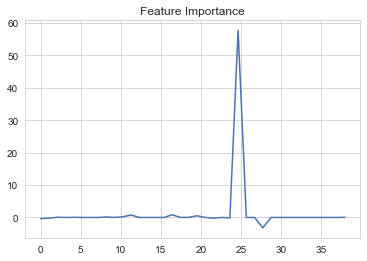

In [106]:
plt.plot(np.linspace(0,38,38),feature_importance)

plt.title("Feature Importance")

plt.show()

In [107]:
X_train.columns[24]

'total_cases_lag1'

In [108]:
important_features = np.where(feature_importance != 0)[0]
print(f'Important features: {important_features}')

Important features: [ 0  1  2  4  8 10 11 16 18 19 21 23 24 27 37]


In [109]:
X_train_important = X_train.iloc[:, important_features]
X_val_important = X_val.iloc[:, important_features]

In [110]:
lasso.fit(X_train_important, y_train)
y_pred = lasso.predict(X_val_important)
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 32.96144702701446


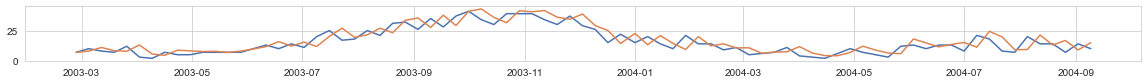

In [111]:
plt.figure(figsize=(20,1))
plt.plot(y_val.index,y_val)
plt.plot(y_val.index,y_pred)

In [112]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [113]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [114]:
y_pred = rf.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 31.465933333333336


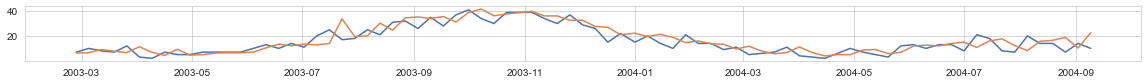

In [115]:
plt.figure(figsize=(20,1))
plt.plot(y_val.index,y_val)
plt.plot(y_val.index,y_pred)

In [116]:
sfm = SelectFromModel(rf, prefit=True)

In [117]:
X_train_selected = sfm.transform(X_train)
X_val_selected = sfm.transform(X_val)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [118]:
print(f'Number of features selected: {X_train_selected.shape[1]}')

Number of features selected: 1


In [119]:
# 1 feature is not enough
median = np.median(rf.feature_importances_)
sfm = SelectFromModel(rf, threshold=median, prefit=True)
X_train_selected = sfm.transform(X_train)
X_val_selected = sfm.transform(X_val)

selected_features = np.array(X_train.columns)[sfm.get_support()]
print(f'Number of features selected: {X_train_selected.shape[1]}')
print(f'Selected features: {selected_features}')

Number of features selected: 19
Selected features: ['weekofyear' 'ndvi_nw' 'ndvi_se' 'reanalysis_specific_humidity_g_per_kg'
 'station_diur_temp_rng_c' 'reanalysis_dew_point_temp_c'
 'station_avg_temp_c_lag2' 'station_avg_temp_c_lag4'
 'station_avg_temp_c_lag8' 'station_avg_temp_c_lag12'
 'station_precip_mm_lag1' 'station_precip_mm_lag4' 'total_cases_lag1'
 'total_cases_lag2' 'total_cases_lag4' 'total_cases_lag8'
 'total_cases_lag12'
 'station_diur_temp_rng_c*reanalysis_precip_amt_kg_per_m2'
 'seasonal_feature']


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Mean Squared Error: 31.498686419753092


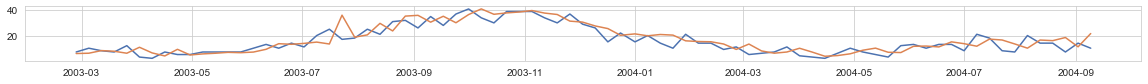

In [120]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_selected, y_train)
y_pred = rf.predict(X_val_selected)
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')

plt.figure(figsize=(20,1))
plt.plot(y_val.index,y_val)
plt.plot(y_val.index,y_pred)

# Model Development

## Machine Learning Model

In [121]:
X_train, X_val, y_train, y_val = X_train[selected_features], X_val[selected_features], y_train, y_val

In [129]:
models = [
    RandomForestRegressor(),
    MLPRegressor(),
    SVR(),
    KernelRidge(),
    GaussianProcessRegressor(),
    GradientBoostingRegressor(),
    TPOTRegressor(generations=5, population_size=50, verbosity=2)
]

for model in models:
    model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -231.17572129737232

Generation 2 - Current best internal CV score: -230.92020727524974

Generation 3 - Current best internal CV score: -226.35344035372796

Generation 4 - Current best internal CV score: -225.94910203630553

Generation 5 - Current best internal CV score: -225.94910203630553

Best pipeline: LinearSVR(SelectPercentile(input_matrix, percentile=5), C=10.0, dual=False, epsilon=0.001, loss=squared_epsilon_insensitive, tol=0.01)


In [171]:
predictions = np.column_stack([
    model.predict(X_val) for model in models
])

In [179]:
predictions = pd.DataFrame(predictions, columns = ['RandomForestRegressor',
    'MLPRegressor',
    'SVR',
    'KernelRidge',
    'GaussianProcessRegressor',
    'GradientBoostingRegressor',
    'TPOTRegressor'])

## Bayesian Methods

In [133]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=7)
    sigma = pm.HalfNormal('sigma', sigma=10)

    mu = alpha + tt.dot(predictions, beta)
    observed = pm.Normal('observed', mu=mu, sigma=sigma, observed=y_val)
    
    trace = pm.sample(2000, tune=1000)

alpha_post = np.mean(trace['alpha'])
beta_post = np.mean(trace['beta'], axis=0)

final_prediction = alpha_post + np.dot(predictions.values, beta_post)
ci_lower, ci_upper = np.percentile(final_prediction, [2.5, 97.5])

/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 92 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 222 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


In [134]:
prob_greater_than_32 = np.mean(final_prediction > 32)

# Model Evaluation and Tuning

## Cross-Validation

In [141]:
alpha_samples = trace['alpha']
beta_samples = trace['beta']

In [142]:
ensemble_predictions_samples = np.array([
    alpha_sample + np.dot(predictions.values, beta_sample)
    for alpha_sample, beta_sample in zip(alpha_samples, beta_samples)
])

ci_lower, ci_upper = np.percentile(ensemble_predictions_samples, [2.5, 97.5], axis=0)

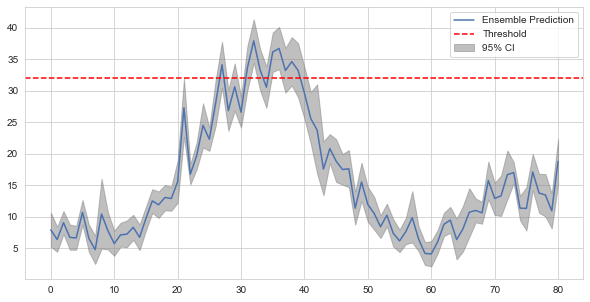

In [143]:
plt.figure(figsize=(10, 5))
plt.plot(final_prediction, label='Ensemble Prediction')
plt.fill_between(np.arange(len(final_prediction)), ci_lower, ci_upper, color='gray', alpha=0.5, label='95% CI')
plt.axhline(y=32, color='red', linestyle='--', label='Threshold')
plt.legend()
plt.show()

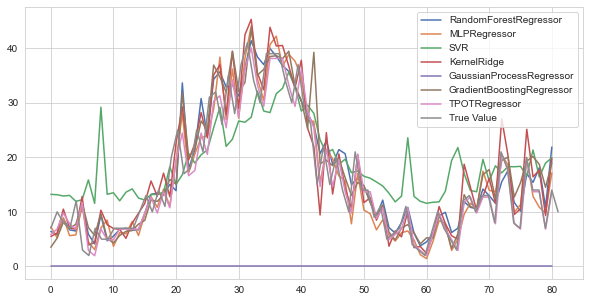

In [180]:
plt.figure(figsize=(10, 5))
plt.plot(predictions, label=predictions.columns)

plt.plot(np.linspace(0,81,81),y_val, label='True Value')

plt.legend()

plt.show()

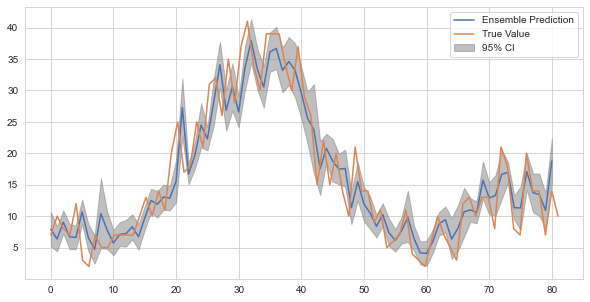

In [153]:
plt.figure(figsize=(10, 5))
plt.plot(final_prediction, label='Ensemble Prediction')
plt.fill_between(np.arange(len(final_prediction)), ci_lower, ci_upper, color='gray', alpha=0.5, label='95% CI')

plt.plot(np.linspace(0,81,81),y_val, label='True Value')

plt.legend()

plt.show()

In [139]:
mse = mean_squared_error(y_val, final_prediction)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 23.76364338037113


## Tuning

In [181]:
models = [
    RandomForestRegressor(),
    MLPRegressor(),
    KernelRidge(),
    GradientBoostingRegressor(),
    TPOTRegressor(generations=5, population_size=50, verbosity=2)
]

for model in models:
    model.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -231.75415500530957

Generation 2 - Current best internal CV score: -230.96045985573136

Generation 3 - Current best internal CV score: -230.5602949850197

Generation 4 - Current best internal CV score: -230.5602949850197

Generation 5 - Current best internal CV score: -230.5602949850197

Best pipeline: ElasticNetCV(input_matrix, l1_ratio=0.05, tol=0.1)


In [182]:
predictions = np.column_stack([
    model.predict(X_val) for model in models
])

In [183]:
predictions = pd.DataFrame(predictions, columns = ['RandomForestRegressor',
    'MLPRegressor',
    'KernelRidge',
    'GradientBoostingRegressor',
    'TPOTRegressor'])

In [185]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=5)
    sigma = pm.HalfNormal('sigma', sigma=10)

    mu = alpha + tt.dot(predictions, beta)
    observed = pm.Normal('observed', mu=mu, sigma=sigma, observed=y_val)
    
    trace = pm.sample(2000, tune=1000)

alpha_post = np.mean(trace['alpha'])
beta_post = np.mean(trace['beta'], axis=0)

final_prediction = alpha_post + np.dot(predictions.values, beta_post)
ci_lower, ci_upper = np.percentile(final_prediction, [2.5, 97.5])

/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 41 seconds.
There were 17 divergences after tuning. Increase `target_accept` or reparameterize.
There were 41 divergences after tuning. Increase `target_accept` or reparameterize.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
There were 139 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


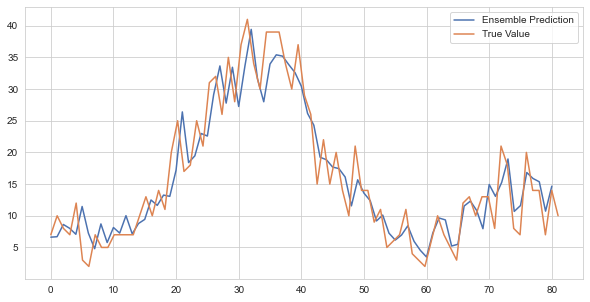

In [186]:
plt.figure(figsize=(10, 5))
plt.plot(final_prediction, label='Ensemble Prediction')

plt.plot(np.linspace(0,81,81),y_val, label='True Value')

plt.legend()

plt.show()

In [187]:
mse = mean_squared_error(y_val, final_prediction)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 23.913384419608107


In [155]:
meta_model = LinearRegression()
meta_model.fit(predictions, y_val)

initial_weights = np.ones(len(models)) / len(models)

def objective(weights):
    ensemble_prediction = np.dot(predictions, weights)
    return np.mean((ensemble_prediction - y_val) ** 2)

bounds = [(0, 1)] * len(models)
cons = [{'type': 'eq', 'fun': lambda w: 1 - sum(w)}]
result = minimize(objective, initial_weights, bounds=bounds, constraints=cons)
optimal_weights = result.x

optimal_ensemble_prediction = np.dot(predictions, optimal_weights)

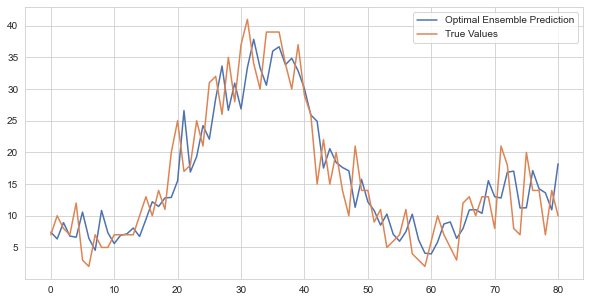

In [217]:
plt.figure(figsize=(10, 5))
plt.plot(optimal_ensemble_prediction, label='Optimal Ensemble Prediction')
plt.plot(np.linspace(0,80,81), y_val, label='True Values')
plt.legend()
plt.show()

In [158]:
mse = mean_squared_error(y_val, optimal_ensemble_prediction)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 23.858690066457754


## Test Set

In [160]:
test = create_lagged_vars(test, columns, lags)
test = create_interaction_vars(test, ['station_max_temp_c', 'station_min_temp_c', 'station_avg_temp_c',
                                       'station_diur_temp_rng_c']
                                , ['reanalysis_precip_amt_kg_per_m2', 'station_precip_mm'])
test['seasonal_feature'] = test['weekofyear'].apply(map_week_to_seasonal)

/var/folders/pj/9y_1xfsd6hgdycw5q9sfcq5w0000gn/T/ipykernel_47879/2525416368.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_lag{lag}'] = df[column].shift(lag)
/var/folders/pj/9y_1xfsd6hgdycw5q9sfcq5w0000gn/T/ipykernel_47879/4234690929.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column1}*{column2}'] = df[column1]*df[column2]
/var/folders/pj/9y_1xfsd6hgdycw5q9sfcq5w0000gn/T/ipykernel_47879/3044902803.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [163]:
X_test = test.drop('total_cases', axis=1)[selected_features]
y_test = test['total_cases']

In [188]:
predictions = np.column_stack([
    model.predict(X_test) for model in models
])

In [191]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=len(models))
    sigma = pm.HalfNormal('sigma', sigma=10)

    mu = alpha + tt.dot(predictions, beta)
    observed = pm.Normal('observed', mu=mu, sigma=sigma, observed=y_test)
    
    trace = pm.sample(2000, tune=1000)

alpha_post = np.mean(trace['alpha'])
beta_post = np.mean(trace['beta'], axis=0)

final_prediction = alpha_post + np.dot(predictions, beta_post)
ci_lower, ci_upper = np.percentile(final_prediction, [2.5, 97.5])

/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 43 seconds.
There were 659 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6929221197946942, but should be close to 0.8. Try to increase the number of tuning steps.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


In [193]:
alpha_samples = trace['alpha']
beta_samples = trace['beta']

In [195]:
ensemble_predictions_samples = np.array([
    alpha_sample + np.dot(predictions, beta_sample)
    for alpha_sample, beta_sample in zip(alpha_samples, beta_samples)
])

ci_lower, ci_upper = np.percentile(ensemble_predictions_samples, [2.5, 97.5], axis=0)

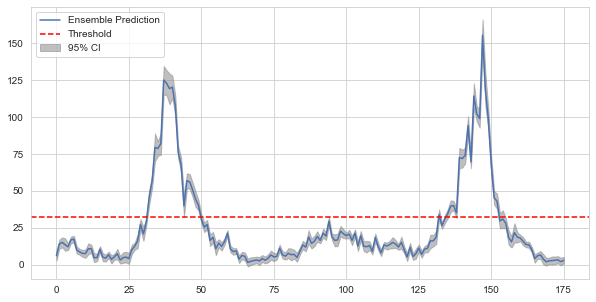

In [196]:
plt.figure(figsize=(10, 5))
plt.plot(final_prediction, label='Ensemble Prediction')
plt.fill_between(np.arange(len(final_prediction)), ci_lower, ci_upper, color='gray', alpha=0.5, label='95% CI')
plt.axhline(y=32, color='red', linestyle='--', label='Threshold')
plt.legend()
plt.show()

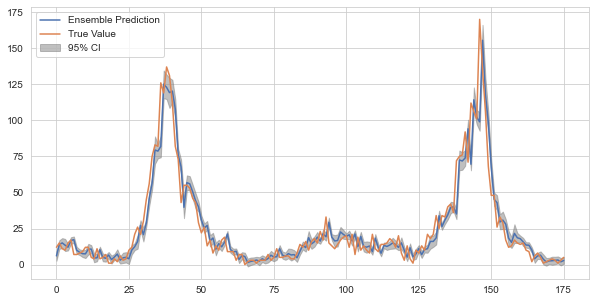

In [218]:
plt.figure(figsize=(10, 5))
plt.plot(final_prediction, label='Ensemble Prediction')
plt.fill_between(np.arange(len(final_prediction)), ci_lower, ci_upper, color='gray', alpha=0.5, label='95% CI')

plt.plot(np.linspace(0,175,176),y_test, label='True Value')

plt.legend()

plt.show()

In [200]:
mse = mean_squared_error(y_val, optimal_ensemble_prediction)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 23.858690066457754


In [212]:
y_test.index = np.linspace(0,175,176)

In [216]:
c_u = pd.DataFrame(ci_upper, columns = ['ci_upper'])
warnings = y_test[c_u['ci_upper'] >= 32]

In [230]:
c1 = pd.DataFrame(y_test[y_test >= 32].index)
c2 = pd.DataFrame(warnings.index)

In [231]:
cc = pd.merge(c1,c2,how = 'inner')

In [245]:
new_precise = warnings[warnings>=32].shape[0]/warnings.shape[0]
new_recall = cc.shape[0]/c1.shape[0]

In [246]:
new_precise,new_recall

(0.8571428571428571, 0.9)

# Model Deployment and Documentation

## Deployment

## Documentation